<a href="https://colab.research.google.com/github/mmastin/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Matt_Mastin_DS_1_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

# pandas, numpy, matplotlib, seaborn, scikit-learn

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# from http://amueller.github.io/sklearn_tutorial/#/7

from sklearn.datasets import load_digits
digits = load_digits()

In [0]:
print('images shape: %s' % str(digits.images.shape))
print('targets shape: %s' % str(digits.target.shape))

images shape: (1797, 8, 8)
targets shape: (1797,)


In [0]:
import matplotlib.pyplot as plt

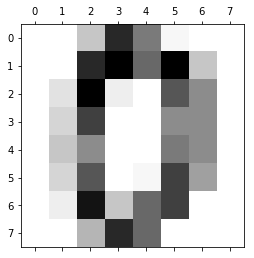

In [0]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys);

In [0]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [0]:
x = digits.data.reshape(-1, 64)
print(x.shape)

(1797, 64)


In [0]:
y = digits.target
print(y.shape)

(1797,)


In [0]:
print(x)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [0]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca = pca.transform(x)
x_pca.shape

(1797, 2)

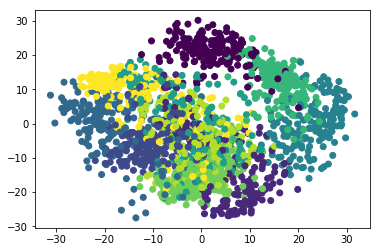

In [0]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y);

In [0]:
print(pca.mean_.shape)
print(pca.components_.shape)

(64,)
(2, 64)


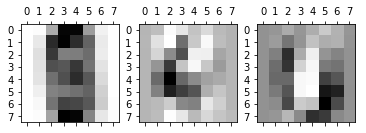

In [0]:
fix, ax = plt.subplots(1, 3)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys);

In [0]:
from sklearn.manifold import Isomap

In [0]:
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(x);

In [0]:
x_isomap = isomap.transform(x)
x_isomap.shape

(1797, 2)

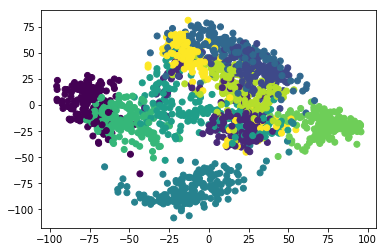

In [0]:
plt.scatter(x_isomap[:, 0], x_isomap[:, 1], c=y);

In [0]:
from sklearn.model_selection import train_test_split

# github tutorial used sklearn.cross_validation, but I guess outdated?

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [0]:
print('x_train shape: %s' % repr(x_train.shape))
print('y_train shape: %s' % repr(y_train.shape))
print('x_test shape %s' % repr(x_test.shape))
print('y_test shape %s' % repr(y_test.shape))

x_train shape: (1347, 64)
y_train shape: (1347,)
x_test shape (450, 64)
y_test shape (450,)


In [0]:
from sklearn.svm import LinearSVC

In [0]:
svm = LinearSVC()

In [0]:
svm.fit(x_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
svm.predict(x_train)

array([2, 8, 9, ..., 7, 7, 8])

In [0]:
svm.score(x_train, y_train)

0.9925760950259837

In [0]:
svm.score(x_test, y_test)

0.9355555555555556

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier()

In [0]:
rf.fit(x_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
rf.score(x_train, y_train)

0.9992576095025983

In [0]:
rf.score(x_test, y_test)

0.9444444444444444

In [0]:
# Practicing with another notebook example 
# Exploratory Data Analysis
# Visualizing wine quality data

import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/mmastin/Datasets/master/winequality-red.csv', sep=',')

# Initial trouble uploading, had to use raw version with comma separator

In [0]:
df3.shape

(1599, 12)

In [0]:
df3.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


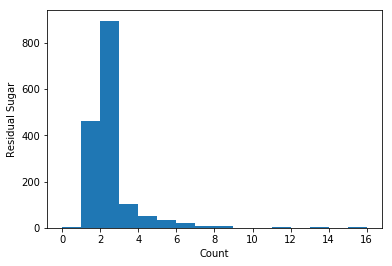

In [0]:
bin_edges = np.arange(0, df3['residual sugar'].max() + 1, 1)
fig = plt.hist(df3['residual sugar'], bins=bin_edges)

plt.xlabel('Count')
plt.ylabel('Residual Sugar')
plt.show()

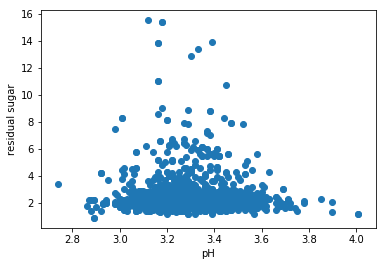

In [0]:
fig = plt.scatter(df3['pH'], df3['residual sugar'])

plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

In [0]:
df3.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


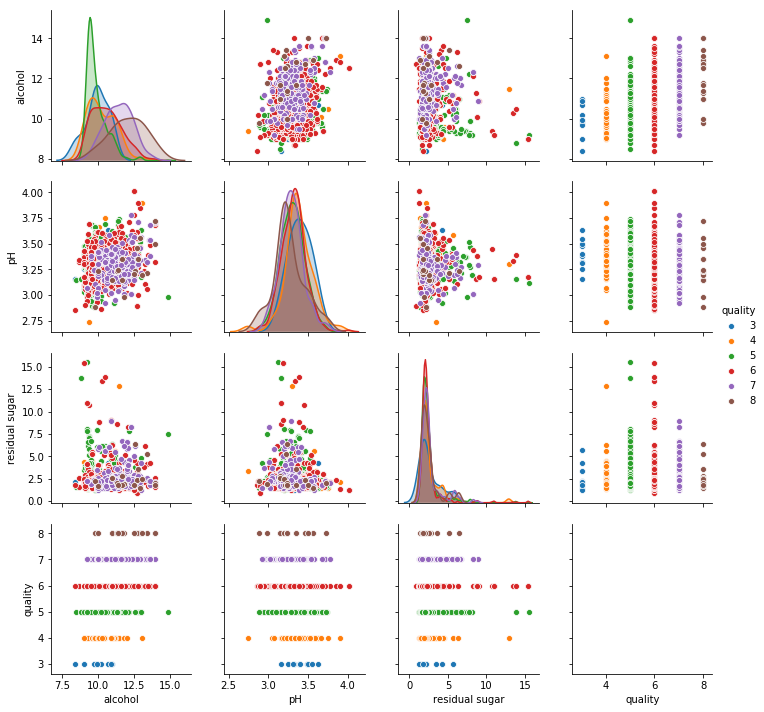

In [0]:
fig = sns.pairplot(data=df3[['alcohol', 'pH', 'residual sugar', 'quality']], hue='quality')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

*Imported a sample dataset to practice using scikitlearn and matplotlib modules.*

2.  What was the most challenging part of what you did?

*Avoiding typos for functions that I've never used before.*

3.  What was the most interesting thing you learned?

*How simple it can be to create complex-looking graphs.*

4.  What area would you like to explore with more time?

*Just practicing by general Python skills. More familiarity with github - I tried to recreate a few different sports or science related notebooks, but they were tough to access for some reason.*


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.